# Linear Regression
지도학습은 두 가지 유형으로 나뉘는데, 바로 분류와 회귀입니다. 이 두 가지 기법의 가장 큰 차이는 분류는 예측값이 **이산형 클래스 값**이고, 회귀는 **연속형 숫자 값**이라는 것입니다.  
여러 가지 회귀 중에서 선형 회귀가 가장 많이 사용됩니다. 선형 회귀는 실제 값과 예측값의 차이를 최소화하는 직선형 회귀선을 최적화하는 방식입니다.
> * **일반 선형 회귀(Simple Linear Regression)** :  예측값과 실제 값의 RSS(Residual Sum of Squares)를 최소화할 수 있도록 회귀 계수를 최적화하며, 규제(Regularization)를 적용하지 않은 모델입니다.
> * **라쏘(Lasso)** : 선형 회귀에 L1 규제를 적용한 모델입니다.
> * **릿지(Ridge)** : 선형 회귀에 L2 규제를 적용한 모델입니다.
> * **로지스틱 회귀(Logistic Regression)** : 분류에 사용되는 선형 모델로, 매우 강력한 분류 알고리즘입니다.

# Simple Linear Regression 

In [26]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## 데이터 세트 생성
간단한 회귀 식인 y = 4X + 6을 근사하기 위한 100개의 데이터 세트를 만듭니다.

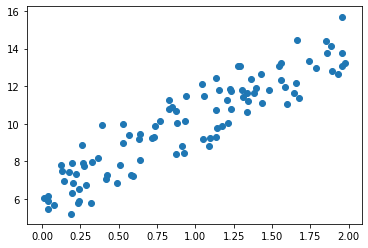

In [76]:
np.random.seed(0)
X = 2 * np.random.rand(100,1)
y = 4*X + 6 + np.random.randn(100,1)
plt.scatter(X,y)
plt.show()

## Gradient descent
경사 하강법을 이용해 회귀계수 w를 4에 가까운 값으로, b를 6에 가까운 값으로 도출합니다.
> **get_weight_updates()** : w와 b의 업데이트 할 값을 구하는 함수 

In [83]:
def get_weight_updates(w,b,X,y,learning_rate=0.001) :
    N = len(y)

    # 먼저 각각 w,b의 shape와 동일한 크기를 가진 0 값으로 초기화
    w_update = np.zeros_like(w)
    b_update = np.zeros_like(b)
    
    # 예측 배열 계산
    # np.dot() 행렬 간 내적 곱
    y_pred = np.dot(X, w.T) + b
    
    # 실제 값의 차이 계산
    diff = y-y_pred
    
    #b를 dot 행렬 연산으로 구하기 위해 모두 1값을 가진 행렬 생성
    b_factors = np.ones((N, 1))
    
    w_update = -(2/N) * learning_rate * (np.dot(X.T, diff))
    b_update = -(2/N) * learning_rate * (np.dot(b_factors.T, diff))
    
    return w_update, b_update

> **gradient_descent_steps()** : get_weight_updates()를 Gradient descent 방식으로 반복적으로 수행하여 w와 b를 업데이트 하는 함수

In [84]:
def gradient_descent_steps(X, y, iters=10000) :
    
    # w와 b를 모두 0으로 초기화
    w = np.zeros((1,1))
    b = np.zeros((1,1))
    
    # 인자로 주어진 iters만큼 반복적으로 get_weight_updates() 호출해 업데이트 수행
    for i in range(iters) :
        w_update, b_update = get_weight_updates(w, b, X, y)
        w = w - w_update
        b = b - b_update
        
    return w, b

> **get_cost()** : 최종적으로 예측값과 실제값의 RSS차이를 계산하는 함수

In [85]:
def get_cost(y, y_pred) :
    N = len(y)
    cost = np.sum(np.square(y - y_pred))/N
    return cost

## 데이터 학습

In [86]:
w, b = gradient_descent_steps(X, y)

## 결과 출력

In [148]:
print("w:{0:.3f} , b:{1:.3f}".format(w[0,0], b[0,0]))
y_pred = w[0,0] * X + b
print('Gradient Descent Total Cost : {0:.4f}'.format(get_cost(y,y_pred)))

w:4.022 , b:6.162
Gradient Descent Total Cost : 0.9935


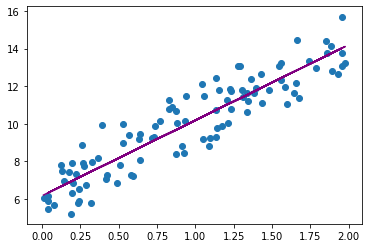

In [88]:
plt.scatter(X,y)
plt.plot(X, y_pred, c='purple')
plt.show()

# Logistic Regression 
로지스틱 회귀는 선형 회귀 방식을 기반으로 하되, 시그모이드 함수를 이용해 분류를 수행하는 회귀입니다. 회귀 라인이 0과 1을 제대로 분류하지 못할 때, S자 커브 형태의 **sigmoid 함수**를 이용하면 좀 더 정확하게 분류 할 수 있습니다.

### 위스콘신 유방암 데이터 세트 분류하기
종양의 크기에 따라 악성 종양인지(Yes = 1) 그렇지 않은지(No = 0)를 회귀를 이용해 1과 0의 값으로 예측합니다.  
> sklearn의 load_breast_cancer()를 호출해 전체 데이터 세트를 생성합니다.

In [107]:
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.linear_model import LogisticRegression

cancer = load_breast_cancer()

cancer.data.shape
cancer.target.shape

(569,)

> 데이터를 학습 데이터와 테스트 데이터 세트로 나눕니다.  
> 선형 회귀 계열의 로지스틱 회귀는 데이터의 정규 분포도에 따라 예측 성능 영향을 받을 수 있으므로 데이터에 먼저 **정규 분포 형태의 표준 스케일링**을 적용합니다.

In [109]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# StandardScaler()로 평균이 0, 분산 1로 데이터 분포도 변환
scaler = StandardScaler()
data_scaled = scaler.fit_transform(cancer.data)

X_train, X_test, y_train, y_test = train_test_split(data_scaled, cancer.target, 
                                                    test_size=0.3, random_state=0)

> 로지스틱 회귀를 이용해 학습 및 예측을 수행하고, 정확도를 구해봅시다.

In [113]:
from sklearn.metrics import accuracy_score, roc_auc_score

#학습
lr_clf = LogisticRegression()
lr_clf.fit(X_train, y_train)

#예측
lr_preds = lr_clf.predict(X_test)

#정확도
print('accuracy: {:0.3f}'.format(accuracy_score(y_test, lr_preds)))

accuracy: 0.977


### 정답값과 예측값 출력

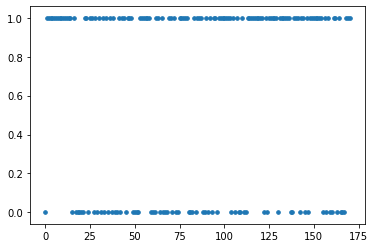

In [146]:
# test 데이터 셋
x = np.arange(0,len(y_test))
plt.scatter(x, y_test, s=13)
plt.show()

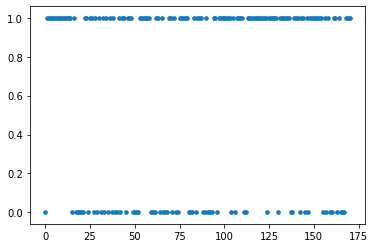

In [147]:
# predict 데이터 셋
x = np.arange(0,len(lr_preds))
plt.scatter(x, lr_preds, s=13)
plt.show()